In [76]:
from importlib import reload ,import_module
import module.utilize as utilize
import module.multiVariant as multiVariant
import module.singleVariant as singleVariant
import module.multiHistogramBase as multiHistogramBase
import numpy as np
from numba import njit,jit, float32
import module.singleVariantCopulaBase as CopulaBase
from tqdm import tqdm
import time

reload(utilize)
reload(multiVariant)
reload(singleVariant)
reload(multiHistogramBase)
reload(CopulaBase)

startTime=time.time()

attribute_names=np.array(["SALT","TEMP"])
all_ensamble_data=np.empty([0,180,20,250,250])
incremental_number=180

for name in attribute_names:
    data=utilize.readRedSeaFile(name)
    data=data.reshape(1,180,20,250,250)
    all_ensamble_data=np.append(all_ensamble_data,data,axis=0)

#print(all_ensamble_data.shape)
#print(all_ensamble_data[0].shape)
covBlockSize=5
dataBlockSize=5
binsNumber=128
sizeZ=15
sizeY=15
sizeX=15
minMaxBlockSize=2
isMinMax=False

#oursModel=multiVariant.multiDistCopula3D(all_ensamble_data,dataBlockSize,covBlockSize,binsNumber,[sizeZ,sizeY,sizeX],minMaxBlockSize,isMinMax)
oursModel=multiVariant.multiDistCopula3D.load(f"RedSea_{attribute_names.shape[0]}varaibles_{incremental_number}members_128Bins_dBlock5_cBlock5")
conditions=np.array([[0,1e5],[3e10,5e10]])


In [77]:
salt_model=oursModel.singleDistModels[0]





37
38
39
40
41
42
43
44
45
87
88
89
90
91
92
93
94
95
136
137
138
139
140
141
142
143
144
183
184
185
186
187
188
189
190
191
192
193
194
231
232
233
234
235
236
237
238
239
241
242
243
244
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
824
825
826
827
828
82

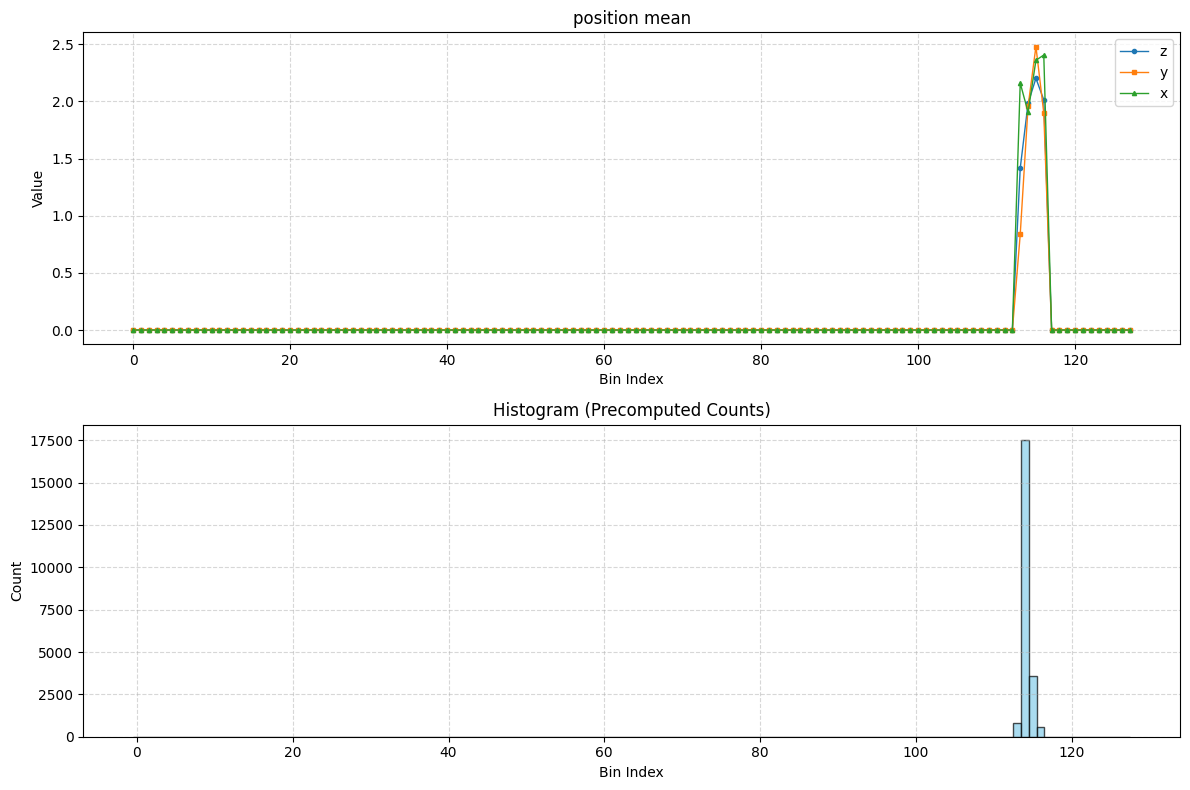

In [78]:
z=[]
y=[]
x=[]
blockNumber=141
for i in range(binsNumber):
    pos=salt_model.blocks[blockNumber].getMean(i)
    z.append(pos[0])
    y.append(pos[1])
    x.append(pos[2])
z=np.array(z)
y=np.array(y)
x=np.array(x)

for i in range(len(salt_model.blocks)):
    hist=salt_model.blocks[i].hist
    nonZeroCount=np.count_nonzero(hist)
    if nonZeroCount>2:
        print(i)
print(len(salt_model.blocks))
hist=salt_model.blocks[blockNumber].hist
import matplotlib.pyplot as plt

# 假設有一個長度 128 的陣列
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(z, label="z", marker='o', markersize=3, linewidth=1)
axes[0].plot(y, label="y", marker='s', markersize=3, linewidth=1)
axes[0].plot(x, label="x", marker='^', markersize=3, linewidth=1)
axes[0].set_title("position mean")
axes[0].set_xlabel("Bin Index")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)


bin_edges = np.arange(len(hist))  # 這裡假設 bin 是 0,1,2,...127
axes[1].bar(bin_edges, hist, width=1.0, color="skyblue", edgecolor="black", alpha=0.7)
axes[1].set_title("Histogram (Precomputed Counts)")
axes[1].set_xlabel("Bin Index")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

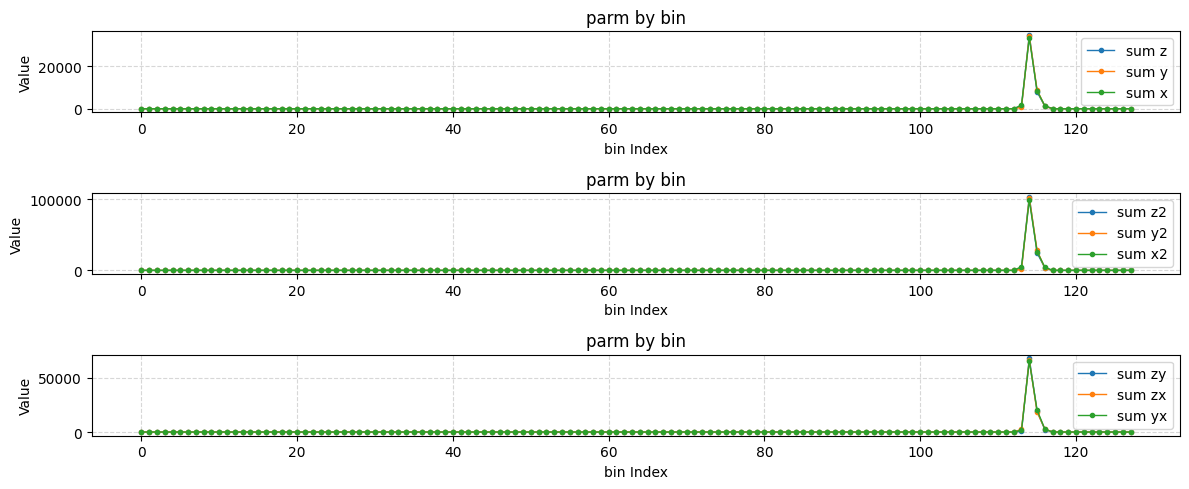

[np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.

In [79]:
sum_z=[]
sum_y=[]
sum_x=[]
sum_z2=[]
sum_y2=[]
sum_x2=[]
sum_zy=[]
sum_zx=[]
sum_yx=[]

for i in range(binsNumber):
    
    
    parm=salt_model.blocks[blockNumber].getParmByBinNumber(i)
    sum_z.append(parm[0])
    sum_y.append(parm[1])
    sum_x.append(parm[2])

    sum_z2.append(parm[3])
    sum_y2.append(parm[4])
    sum_x2.append(parm[5])

    sum_zy.append(parm[6])
    sum_zx.append(parm[7])
    sum_yx.append(parm[8])

fig, axes = plt.subplots(3, 1, figsize=(12, 5))
axes[0].plot(sum_z, label=f"sum z", marker='o', markersize=3, linewidth=1)
axes[0].plot(sum_y, label=f"sum y", marker='o', markersize=3, linewidth=1)
axes[0].plot(sum_x, label=f"sum x", marker='o', markersize=3, linewidth=1)

axes[0].set_title("parm by bin")
axes[0].set_xlabel("bin Index")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].plot(sum_z2, label=f"sum z2", marker='o', markersize=3, linewidth=1)
axes[1].plot(sum_y2, label=f"sum y2", marker='o', markersize=3, linewidth=1)
axes[1].plot(sum_x2, label=f"sum x2", marker='o', markersize=3, linewidth=1)

axes[1].set_title("parm by bin")
axes[1].set_xlabel("bin Index")
axes[1].set_ylabel("Value")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

axes[2].plot(sum_zy, label=f"sum zy", marker='o', markersize=3, linewidth=1)
axes[2].plot(sum_zx, label=f"sum zx", marker='o', markersize=3, linewidth=1)
axes[2].plot(sum_yx, label=f"sum yx", marker='o', markersize=3, linewidth=1)

axes[2].set_title("parm by bin")
axes[2].set_xlabel("bin Index")
axes[2].set_ylabel("Value")
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(sum_z2)
print(sum_y2)
print(sum_x2)

In [80]:
import numpy as np
import os

class DeltaCOOCompressor:
    def __init__(self):
        pass

    def save(self, filename, arrays):
        arrays = [np.asarray(a, dtype=np.float32).ravel() for a in arrays]
        base = arrays[0]
        mask = base != 0
        indices = np.nonzero(mask)[0].astype(np.uint32)
        base_values = base[mask].astype(np.float32)
        save_dict = {
            "indices": indices,
            "base_values": base_values,
            "length": np.array([len(base)], dtype=np.uint32)
        }

        # 原始大小
        before_size = sum(a.nbytes for a in arrays)
        print(f"🔹 壓縮前總容量：{before_size:,} bytes")

        # delta 壓縮（僅對非零位置）
        prev = base[mask]
        print(prev)
        for i in range(1, len(arrays)):
            delta = arrays[i][mask] - prev
            idx_nz = np.nonzero(delta)[0].astype(np.uint32)
            val_nz = delta[idx_nz].astype(np.float32)
            save_dict[f"delta_{i}_idx"] = idx_nz
            save_dict[f"delta_{i}_val"] = val_nz
            prev = arrays[i][mask]

        np.savez_compressed(filename, **save_dict)

        after_size = os.path.getsize(filename)
        ratio = after_size / before_size * 100
        print(f"🔹 壓縮後容量：{after_size:,} bytes")
        print(f"💾 壓縮率：{ratio:.2f}%")

    def load(self, filename):
        data = np.load(filename)
        length = int(data["length"][0])
        indices = data["indices"]
        base_values = data["base_values"]
        arrays = []

        # 還原 base
        base = np.zeros(length, dtype=np.float32)
        base[indices] = base_values
        arrays.append(base.copy())

        # 還原其他 delta
        prev = base_values.copy()
        i = 1
        while f"delta_{i}_idx" in data:
            delta = np.zeros_like(prev)
            idx = data[f"delta_{i}_idx"]
            val = data[f"delta_{i}_val"]
            delta[idx] = val
            curr = prev + delta

            arr = np.zeros(length, dtype=np.float32)
            arr[indices] = curr
            arrays.append(arr)
            prev = curr
            i += 1

        return arrays

In [81]:
sum_z=np.array(sum_z,dtype=np.float32)
sum_y=np.array(sum_y,dtype=np.float32)
sum_x=np.array(sum_x,dtype=np.float32)


arr1 = np.zeros(128, dtype=np.float32)
arr2 = np.zeros(128, dtype=np.float32)
arr3 = np.zeros(128, dtype=np.float32)

arr1[110:114] = [2890, 103911, 24663, 3536]
arr2[110:114] = [1334, 102324, 28349, 2993]
arr3[110:114] = [5227, 98755, 26595, 4423]

compressor = DeltaCOOCompressor()
compressor.save("delta_coo_base_sparse.npz", [arr1, arr2, arr3])

arrays_rec = compressor.load("delta_coo_base_sparse.npz")

# 驗證誤差
for i, (orig, rec) in enumerate(zip([arr1, arr2, arr3], arrays_rec)):
    print(f"Array {i+1} 最大誤差:", np.abs(orig - rec).max())

🔹 壓縮前總容量：1,536 bytes
[  2890. 103911.  24663.   3536.]
🔹 壓縮後容量：1,447 bytes
💾 壓縮率：94.21%
Array 1 最大誤差: 0.0
Array 2 最大誤差: 0.0
Array 3 最大誤差: 0.0
